# Data pre-processing and exploratory data analysis


In [ ]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.under_sampling import TomekLinks
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize


In [ ]:
# loading datasets
dataset1 = pd.read_csv('pet_dataset1_raw.csv', sep = ',')
dataset2 = pd.read_csv('pet_dataset2_raw.csv', sep = ',')

## Handling missing values

### Dataset 1

In [ ]:
dataset1.head()

Text(0.5, 0, 'Adoption speed label')

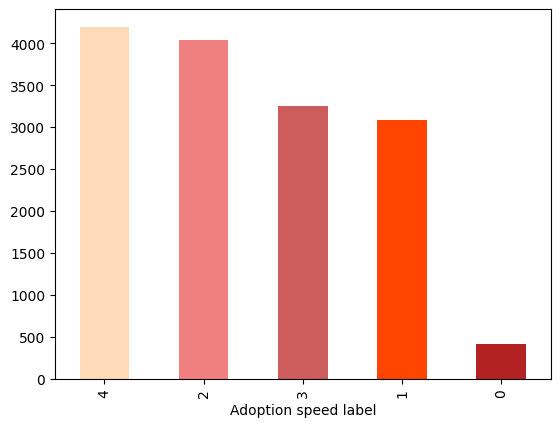

In [ ]:
# visualizing the inital dataset 1 label
adoption_count = dataset1['AdoptionSpeed'].value_counts()

adoption_count.plot(kind='bar', color= ['peachpuff', 'lightcoral', 'indianred', 'orangered', 'firebrick' ])


plt.xlabel('Adoption speed label')


In [ ]:
# the columns 'Name' and 'Description' contain missing values. The column 'Name' will not be used. The column 'Description' is treated.
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [ ]:
dataset1[dataset1['Description'].isna()]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
96,2,Manja,19,285,0,2,1,6,0,3,...,1,1,0,41401,12c51d7222986fbf000db9061f5082be,0,NaN,5e4154870,3.0,1
605,2,Mickey,2,264,0,1,1,7,0,2,...,1,1,0,41401,bb7e38ebd628443cefb56024635dd647,0,NaN,56583003c,3.0,4
1098,2,Pucci,6,266,292,1,1,6,0,1,...,1,1,0,41326,90b00f90ffdf9ec1cac529a2bbef3ecc,0,NaN,8c4c4bc6e,1.0,4
2109,1,Chelsea And Sherbert,31,307,0,2,1,2,7,2,...,1,2,0,41401,c814d8b7928da23e3add9ec4d270de95,0,NaN,50eddd1bb,3.0,2
4218,2,Mog,84,266,0,1,3,0,0,3,...,1,1,0,41401,bc630ee7cec2fa789b0412ff798df83f,0,NaN,9d82e4438,5.0,2
4904,2,Brumby,2,299,0,1,1,7,0,2,...,1,1,0,41326,744fa4278196568a18fcf5cd7d324ed2,0,NaN,ba16888d7,2.0,2
6041,2,Oshin & Lola,3,254,254,2,2,7,0,1,...,1,2,0,41326,6a33f105d818ce64de49a0b83a33b35a,0,NaN,4ec25bc3b,4.0,3
8674,2,KANTHAKA,2,299,0,2,1,7,0,2,...,1,1,0,41326,744fa4278196568a18fcf5cd7d324ed2,0,NaN,97f0a97ef,1.0,2
10272,1,Unknown,0,307,0,1,5,7,0,2,...,2,1,0,41326,f0997d267a9acadd44a5301a18f83df5,0,NaN,f67786a70,0.0,4
11365,2,J,25,292,292,1,2,0,0,3,...,1,1,0,41326,0bda3ae2e5c78a3b2ff9a725dbe42161,0,NaN,f775ef952,1.0,2


In [ ]:
dataset1['Description'].fillna('', inplace=True)

### Dataset 2

In [ ]:
# selecting the columns from dataset2 that can be used
selected_columns = []
for x in range(0, 12):
    selected_columns.append(dataset2.columns[x])

dataset2 = dataset2.loc[:, selected_columns]

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676004 entries, 0 to 676003
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   pid          676004 non-null  int64 
 1   text         676004 non-null  object
 2   country      676004 non-null  object
 3   color_code   676004 non-null  object
 4   pet          676004 non-null  object
 5   pet_code     676004 non-null  object
 6   age          676004 non-null  object
 7   gender       676004 non-null  object
 8   size         676004 non-null  object
 9   photos       676004 non-null  int64 
 10  status       676004 non-null  object
 11  status_code  676004 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 61.9+ MB


## Preprocessing

### Renaming columns

In [ ]:
# renaming the columns for  dataset1
dataset1 = dataset1.rename(columns={'Type': 'pet', 'Age': 'age', 'Gender': 'gender', 'MaturitySize': 'size', 'Description': 'description', 'PetID': 'pid', 'PhotoAmt': 'photos', 'AdoptionSpeed': 'adopted', 'Color1': 'color'})
dataset1.columns

Index(['pet', 'Name', 'age', 'Breed1', 'Breed2', 'gender', 'color', 'Color2',
       'Color3', 'size', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt',
       'description', 'pid', 'photos', 'adopted'],
      dtype='object')

In [ ]:
#renaming the columns for dataset2
dataset2 = dataset2.rename(columns={'text':'description', 'status':'adopted', 'color_code': 'color' })
dataset2.columns

Index(['pid', 'description', 'country', 'color', 'pet', 'pet_code', 'age',
       'gender', 'size', 'photos', 'adopted', 'status_code'],
      dtype='object')

## Relabeling of target variable and other variables

In [ ]:
# changing the target variable from multiclass to binary

dataset1['adopted'] = dataset1['adopted'].replace({
    0: 'Adopted',
    1: 'Adopted',
    2: 'Adopted',
    3: 'Adopted',
    4: 'Unadopted'})

In [ ]:
# #the primary colors in dataset1 were coded from 0-7, so here they are uncoded to the related color label
dataset1['color'] = dataset1['color'].replace({
    0: None,
    1: 'Black',
    2: 'Brown',
    3: 'Golden',
    4: 'Yellow',
    5: 'Cream',
    6: 'Gray',
    7: 'White'})

# the sizes of the animals in the dataset1 were coded from 0-4, so here they are uncoded to the related size
dataset1['size'] = dataset1['size'].replace({
    0: 'Not specified',
    1: 'Small',
    2: 'Medium',
    3: 'Large',
    4: 'Extra Large'})

# in dataset1, the type of animal was specified by 1 or 2 and this is changed to 'Dog' and 'Cat' to match dataset2
dataset1['pet'] = dataset1['pet'].replace({
    1: 'Dog',
    2: 'Cat'})

# the same was the case for gender
dataset1['gender'] = dataset1['gender'].replace({
    1: 'Male',
    2: 'Female',
    3: 'Mixed'})

#some colors in dataset2 were combined, so we'll do that for dataset 1 as well.
dataset1['color'] = dataset1['color'].replace({
    'White': 'White_Cream',
    'Cream': 'White_Cream',
    'Brown': 'Brown_Chocolate',
})

dataset2['color'] = dataset2['color'].replace({
    'Grey': 'Gray'
})

# in dataset2, the age was given in months, where in dataset2 it is divided in categories. the platform of dataset2
# confirmed the following age ranges of the categories (see below), so we will convert the data from dataset1 to the
# categories in this way.
dataset1['age'] = pd.cut(dataset1['age'], bins=[0, 6, 24, 96, 256], labels=['Baby', 'Young', 'Adult', 'Senior'], right=False)

### Dropping columns

In [ ]:
# dataset1 contains columns that are not present in dataset2, so these are dropped

columns_to_drop = ['Name', 'Breed1', 'Breed2', 'Color2', 'Color3', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt']

dataset1 = dataset1.drop(columns=columns_to_drop)


In [ ]:
# dataset2 contains columns that are not present in dataset1, so these will be dropped

columns_to_drop2 = ['country', 'pet_code', 'status_code']

dataset2 = dataset2.drop(columns=columns_to_drop2)

### Changing dtypes

In [ ]:
# changing dtypes to be the same in both datasets

dataset1['pid'] = dataset1['pid'].astype(str)
dataset2['pid'] = dataset2['pid'].astype(str)
dataset1['photos'] = dataset2['photos'].astype(int)
dataset2['age'] = dataset2['age'].astype('category')

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pet          14993 non-null  object  
 1   age          14993 non-null  category
 2   gender       14993 non-null  object  
 3   color        14993 non-null  object  
 4   size         14993 non-null  object  
 5   description  14993 non-null  object  
 6   pid          14993 non-null  object  
 7   photos       14993 non-null  int64   
 8   adopted      14993 non-null  object  
dtypes: category(1), int64(1), object(7)
memory usage: 952.0+ KB


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676004 entries, 0 to 676003
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   pid          676004 non-null  object  
 1   description  676004 non-null  object  
 2   color        676004 non-null  object  
 3   pet          676004 non-null  object  
 4   age          676004 non-null  category
 5   gender       676004 non-null  object  
 6   size         676004 non-null  object  
 7   photos       676004 non-null  int64   
 8   adopted      676004 non-null  object  
dtypes: category(1), int64(1), object(7)
memory usage: 41.9+ MB


### Merging the datasets

In [ ]:
# merging the datasets

merged_dataset = dataset1.merge(dataset2, how='outer', on=['pet', 'age', 'gender', 'color', 'size', 'description', 'pid',
       'photos', 'adopted'])

merged_dataset

,pet,age,gender,color,size,description,pid,photos,adopted
0,Cat,Baby,Male,Black,Small,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,3,Adopted
1,Cat,Baby,Male,Black,Medium,I just found it alone yesterday near my apartm...,6296e909a,1,Adopted
2,Dog,Baby,Male,Brown_Chocolate,Medium,Their pregnant mother was dumped by her irresp...,3422e4906,2,Adopted
3,Dog,Baby,Female,Black,Medium,"Good guard dog, very alert, active, obedience ...",5842f1ff5,3,Adopted
4,Dog,Baby,Male,Black,Medium,This handsome yet cute boy is up for adoption....,850a43f90,1,Adopted
...,...,...,...,...,...,...,...,...,...
690992,Dog,Senior,Female,Other,Small,Chiquita is a 12 year old chihuahua that just ...,42301573,1,Unadopted
690993,Dog,Adult,Male,White_Cream,Extra Large,5/5/18: JoJo sure would like a family of his o...,32928096,3,Unadopted
690994,Dog,Adult,Male,Unknown,Medium,You can fill out an adoption application onlin...,40855857,3,Unadopted
690995,Cat,Adult,Male,Black_White,Medium,"Found Cat who needs a home ""Kitty"" ? Found Cat...",28488675,1,Unadopted


In [ ]:
# Saving the dataset

merged_dataset.to_csv('prepros1_dataset.csv', index=False)

## Exploring and processing the new dataset

In [ ]:
# loading the dataset

pet_dataset = pd.read_csv('prepros1_dataset.csv')

<ipython-input-32-37de74d374aa>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  pet_dataset = pd.read_csv('/content/drive/MyDrive/Thesis/prepros1_dataset.csv')


In [ ]:
pet_dataset

,pet,age,gender,color,size,description,pid,photos,adopted
0,Cat,Baby,Male,Black,Small,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,3,Adopted
1,Cat,Baby,Male,Black,Medium,I just found it alone yesterday near my apartm...,6296e909a,1,Adopted
2,Dog,Baby,Male,Brown_Chocolate,Medium,Their pregnant mother was dumped by her irresp...,3422e4906,2,Adopted
3,Dog,Baby,Female,Black,Medium,"Good guard dog, very alert, active, obedience ...",5842f1ff5,3,Adopted
4,Dog,Baby,Male,Black,Medium,This handsome yet cute boy is up for adoption....,850a43f90,1,Adopted
...,...,...,...,...,...,...,...,...,...
690992,Dog,Senior,Female,Other,Small,Chiquita is a 12 year old chihuahua that just ...,42301573,1,Unadopted
690993,Dog,Adult,Male,White_Cream,Extra Large,5/5/18: JoJo sure would like a family of his o...,32928096,3,Unadopted
690994,Dog,Adult,Male,Unknown,Medium,You can fill out an adoption application onlin...,40855857,3,Unadopted
690995,Cat,Adult,Male,Black_White,Medium,"Found Cat who needs a home ""Kitty"" ? Found Cat...",28488675,1,Unadopted


In [ ]:
pet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690997 entries, 0 to 690996
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   pet          690997 non-null  object
 1   age          690997 non-null  object
 2   gender       690997 non-null  object
 3   color        690997 non-null  object
 4   size         690997 non-null  object
 5   description  690984 non-null  object
 6   pid          690997 non-null  object
 7   photos       690997 non-null  int64 
 8   adopted      690997 non-null  object
dtypes: int64(1), object(8)
memory usage: 47.4+ MB


### Selecting animals

In [ ]:
# big difference in value counts of the animals. we will only use dogs, cats and rabbits

pet_counts = pet_dataset['pet'].value_counts()
pet_counts

pet
Dog                     415557
Cat                     259371
Rabbit                    6414
Guinea Pig                2561
Horse                     1346
Bird                       922
Small & Furry              844
Parrot                     620
Rat                        594
Ferret                     531
Barnyard                   349
Hamster                    216
Parakeet                   216
Chinchilla                 168
Scales, Fins & Other       153
Reptile                    125
Pot Bellied                124
Turtle                     110
Chicken                     97
Goat                        92
Snake                       81
Mouse                       70
Miniature Horse             52
Pony                        46
Dove                        45
Duck                        38
Gerbil                      32
Pig                         31
Tortoise                    29
Donkey                      29
Finch                       27
Fish                        15
Suga

<ipython-input-53-effaa16dc15e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=pet_counts.head(10).index, y=pet_counts.head(10).values, palette='pastel')


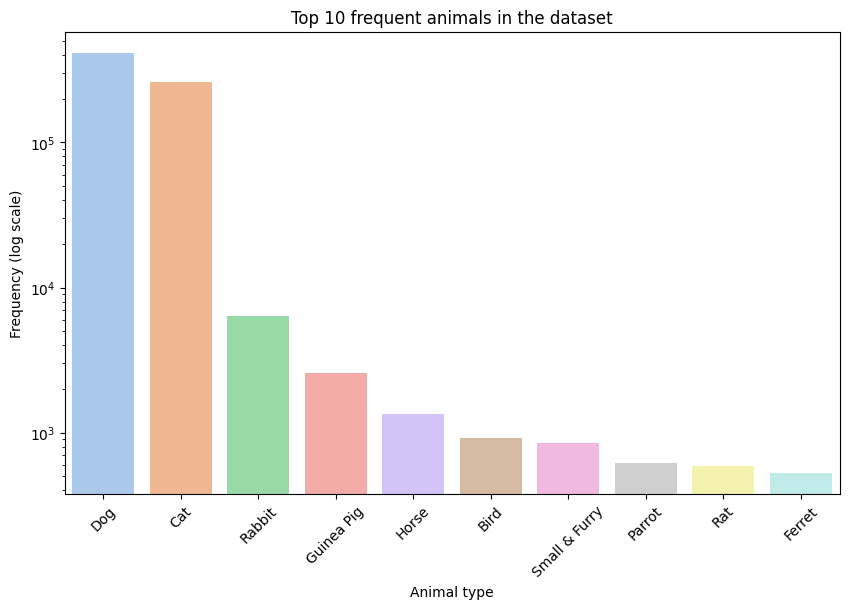

In [ ]:
# visualizing the distribution of animals (in log scale for visability)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=pet_counts.head(10).index, y=pet_counts.head(10).values, palette='pastel')

plt.title('Top 10 frequent animals in the dataset')
plt.ylabel('Frequency (log scale)')
plt.xlabel('Animal type')
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

In [ ]:
# no guinea pig is unadopted
print(
    pet_dataset[pet_dataset['pet'] == 'Rabbit']['adopted'].value_counts().get('Unadopted', 0),
pet_dataset[pet_dataset['pet'] == 'Guinea Pig']['adopted'].value_counts().get('Unadopted', 0)
)


2145 0


In [ ]:
pet_dataset = pet_dataset[pet_dataset['pet'].isin(['Dog', 'Cat', 'Rabbit'])]

In [ ]:
pet_dataset['gender'].value_counts()

gender
Female     343706
Male       335437
Mixed        2180
Unknown        19
Name: count, dtype: int64

In [ ]:
# a lot of unknowns. we keep them in to see whether this also influences adopted/not adopted.

pet_dataset['color'].value_counts()

color
Other              238009
Unknown            226578
Black              121539
White_Cream         33008
Brown_Chocolate     32252
Black_White         24501
Gray                 3874
Golden                947
Yellow                634
Name: count, dtype: int64

In [ ]:
pet_dataset['size'].value_counts()

size
Medium         379370
Small          173289
Large          120095
Extra Large      8588
Name: count, dtype: int64

In [ ]:
pet_dataset

,pet,age,gender,color,size,description,pid,photos,adopted
0,Cat,Baby,Male,Black,Small,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,3,Adopted
1,Cat,Baby,Male,Black,Medium,I just found it alone yesterday near my apartm...,6296e909a,1,Adopted
2,Dog,Baby,Male,Brown_Chocolate,Medium,Their pregnant mother was dumped by her irresp...,3422e4906,2,Adopted
3,Dog,Baby,Female,Black,Medium,"Good guard dog, very alert, active, obedience ...",5842f1ff5,3,Adopted
4,Dog,Baby,Male,Black,Medium,This handsome yet cute boy is up for adoption....,850a43f90,1,Adopted
...,...,...,...,...,...,...,...,...,...
690992,Dog,Senior,Female,Other,Small,Chiquita is a 12 year old chihuahua that just ...,42301573,1,Unadopted
690993,Dog,Adult,Male,White_Cream,Extra Large,5/5/18: JoJo sure would like a family of his o...,32928096,3,Unadopted
690994,Dog,Adult,Male,Unknown,Medium,You can fill out an adoption application onlin...,40855857,3,Unadopted
690995,Cat,Adult,Male,Black_White,Medium,"Found Cat who needs a home ""Kitty"" ? Found Cat...",28488675,1,Unadopted


In [ ]:
pet_dataset.to_csv('prepros2_dataset.csv')